# MSDS 432, Assignment 6 - Breadth-first Search

#### Author: Brandon Moretz

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import matplotlib.style as style
from collections import deque, defaultdict

In [3]:
np.random.seed(323) # static seed so results are reproducible

In [4]:
style.use('seaborn-poster') # sets the size of the charts
style.use('ggplot') # set the theme for matplotlib

In [10]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Helper Utilities

In [5]:
characters = [chr(i) for i in range(97,123)] # character look-up
nested_dict = lambda: defaultdict(nested_dict)
graph = nested_dict()

def gen_code():
    return ''.join([characters[int(np.random.uniform(0, 26))] for k in range(0, 10)]) # generate a random name

def profile(func):
    start_time = time()
    func()
    return time() - start_time

def flatten(d, parent_key=''):
    items = []
    for k, v in d.items():
        try:
            items.extend(flatten(v, '%s%s_' % (parent_key, k)).items())
        except AttributeError:
            items.append(('%s%s' % (parent_key, k), v))
    return dict(items)

## Sample Data

In [6]:
l1 = []
l2 = []
l3 = []
l4 = []
l5 = []

for i in [gen_code() for n in range(0, 5)]:
    if len(l1) < 1:
        l1.append(i)
    for j in [gen_code() for n in range(0, 5)]:
        if len(l2) < 2:
            l2.append(j)
        for k in [gen_code() for n in range(0, 5)]:
            if len(l3) < 3:
                l3.append(k)
            for l in [gen_code() for n in range(0, 5)]:
                if len(l4) < 4:
                    l4.append(l)
                for m in [gen_code() for n in range(0, 5)]:
                    if len(l5) < 5:
                        l5.append(m)
                    graph[i][j][k][l][m] = [{k, k} for k in [gen_code() for n in range(0, 5)]]

graph

defaultdict(<function __main__.<lambda>()>,
            {'zcxwzpzqdy': defaultdict(<function __main__.<lambda>()>,
                         {'bcputahbpp': defaultdict(<function __main__.<lambda>()>,
                                      {'omumwdcjqh': defaultdict(<function __main__.<lambda>()>,
                                                   {'ldwsdxztot': defaultdict(<function __main__.<lambda>()>,
                                                                {'zejzxyrapv': [{'nvesyfuttk'},
                                                                  {'xsvvyfekhw'},
                                                                  {'oexlyvbdcm'},
                                                                  {'bzyoijtuuu'},
                                                                  {'kjrqpnjubd'}],
                                                                 'jljbtzdwyv': [{'zopzdmcdyc'},
                                                                  {'rrolj

## Search Algorithms

In [7]:
search_index = flatten(graph) # cache the search index

def search(name):
    search_queue = deque()
    search_queue += search_index # flatten keys to look-up
    # This array is how you keep track of which items you've searched before.
    searched = []
    while search_queue:
        item = search_queue.popleft() # Only search this item if you haven't already searched it.
        if item not in searched:
            if name in item:
                return True
            else:
                search_queue += graph[item]
                # Marks this item as searched
                searched.append(item)
    return False

## Benchmark

In [8]:
# Create the output metrics DataFrame
results = pd.DataFrame(columns = ['Level', 'Time'])

iters = 100 # calculate average time over n iters

results.loc[0] = [1, profile(lambda: [[search(name) for name in l1] for x in range(iters)]) / iters]
results.loc[1] = [2, profile(lambda: [[search(name) for name in l2] for x in range(iters)]) / iters]
results.loc[2] = [3, profile(lambda: [[search(name) for name in l3] for x in range(iters)]) / iters]
results.loc[3] = [4, profile(lambda: [[search(name) for name in l4] for x in range(iters)]) / iters]
results.loc[4] = [5, profile(lambda: [[search(name) for name in l5] for x in range(iters)]) / iters]

## Results

In [9]:
results # display the results table / DataFrame

,Level,Time
0,1.0,0.00002
1,2.0,0.00015
2,3.0,0.00009
3,4.0,0.00009
4,5.0,0.00010


## Summary

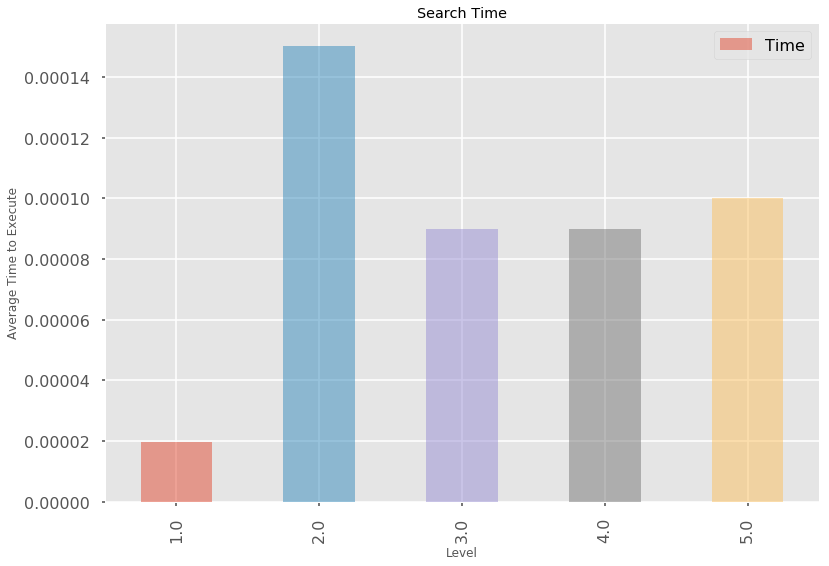

In [11]:
results.plot.bar(x='Level', y='Time', align='center', alpha=0.5)
plt.ylabel('Average Time to Execute')
plt.title('Search Time')

plt.show()

In this lab we examine the traversal of a nested data structure, namely a set of nested dictionaries are used to represent a graph-based data type. The instantiation of the graph is done recursively by declaring the alias “nested_dict” as an expression that returns a new instance of a dictionary. This enables us to create N levels of hierarchy arbitrarily.

We initialize the graph using loop constructs over a simple declaration of key-value pairs by calling a previously defined routine for generating unique ten-digit name codes. While creating the structure, we save the elements from each level we plan on using for benchmark retrieval performance later in the lab.

The breadth first search here is a slight deviation of the example laid out for us in Grokking Algorithms, however, the premise remains the same. We turn the dictionary keys into a flattened look-up structure, then initialize a dequeue type from the key-levels. While iterating over the keys, we examine each level to look for the key in any level.

Also, of note is the fact that we only flatten the keys in the look-up structure once globally. This effectively serves as a primitive caching mechanism that the search function can reuse each call, so there is less overhead in unpacking the keys each search iteration.

As we might intuitively suspect, the increased runtime associated with each level is approximately linear in scale. The asymptotic complexity depends on the number of nodes and edges in the graph, or O( |N| + |E| ) respectively.
Graphs and nested data structures are useful for data engineers in general due to their ability to closely model problems that have a hierarchical nature. Examples of these include network or path traversal problems, garbage collection (reference tracking) and recursively defined datasets. Having a strategy to deal with iterating this type of data is essential for anyone working with complex data definitions such as these.